In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import rand_score
from sklearn.metrics.cluster import contingency_matrix

Tablica kolorów przyjęta dla wykresów:

In [ ]:
COLORS = [
    'red',
    'green',
    'blue',
    'orange',
    'yellow',
    'lightgreen',
    'lightblue'
]

Poniżej znajduje się kod generujący klastry irysów

In [ ]:
iris_2d = pd.read_csv('./iris2D.csv')

x = iris_2d.iloc[:, 1:].values

kmeans = KMeans(n_clusters = 3, random_state = 1, n_init = 'auto')
y_kmeans = kmeans.fit_predict(x)

In [ ]:
for i in range(max(y_kmeans) + 1):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = 50, c = COLORS[i], marker = 'o', edgecolor = 'black',
                label = f'Klaster {i + 1}.')

plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

Wygenerowany wykres:

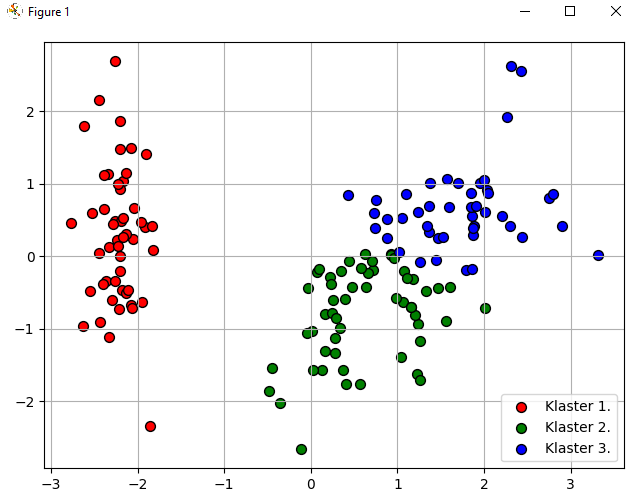

In [ ]:
dbscan3 = DBSCAN(eps = 0.8, min_samples = 3, metric = 'euclidean')
y_dbscan3 = dbscan3.fit_predict(x)

dbscan5 = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean')
y_dbscan5 = dbscan5.fit_predict(x)

dbscan8 = DBSCAN(eps = 0.3, min_samples = 8, metric = 'euclidean')
y_dbscan8 = dbscan8.fit_predict(x)

Kod odpowiadający za wygenorawanie wykresów dla kolejno 3, 5 oraz 8 próbek

In [ ]:
def set_plt_noise_for_dbscan(y_dbscan):
    plt.scatter(x[y_dbscan == -1, 0],
                x[y_dbscan == -1, 1],
                s = 50, c = 'white',
                marker = 'o', edgecolor = 'black',
                label = 'Szum')


def set_plt_concentration_for_dbscan(y_dbscan):
    for i in range(max(y_dbscan) + 1):
        plt.scatter(x[y_dbscan == i, 0],
                    x[y_dbscan == i, 1],
                    s = 50, c = COLORS[i],
                    marker = 'o', edgecolor = 'black',
                    label = f'Skupienie {i + 1}.')


def show_plt_for_dbscan():
    plt.legend(scatterpoints = 1)
    plt.grid()
    plt.tight_layout()
    plt.show()


# 3 samples and 0.8 max distance
set_plt_noise_for_dbscan(y_dbscan3)
set_plt_concentration_for_dbscan(y_dbscan3)
show_plt_for_dbscan()

# 5 samples and 0.5 max distance
set_plt_noise_for_dbscan(y_dbscan5)
set_plt_concentration_for_dbscan(y_dbscan5)
show_plt_for_dbscan()

# 8 samples and 0.3 max distance
set_plt_noise_for_dbscan(y_dbscan8)
set_plt_concentration_for_dbscan(y_dbscan8)
show_plt_for_dbscan()

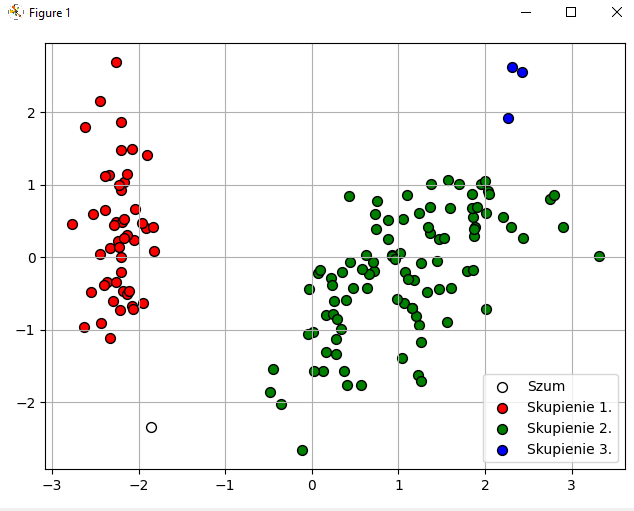

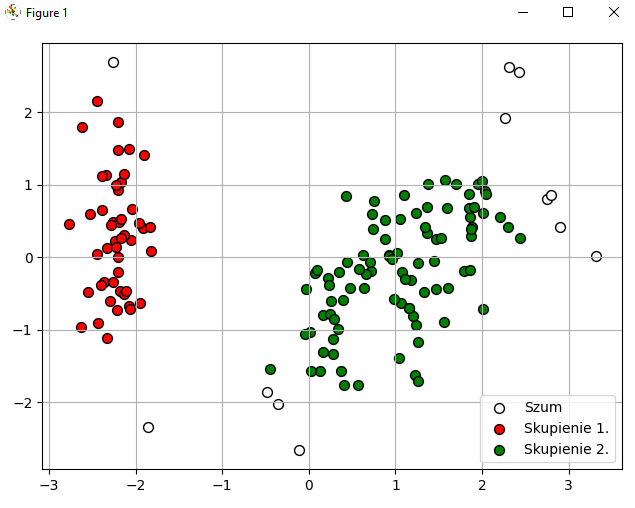

Wykres dla 8 próbek i maks. odległości do sąsiada 0.3

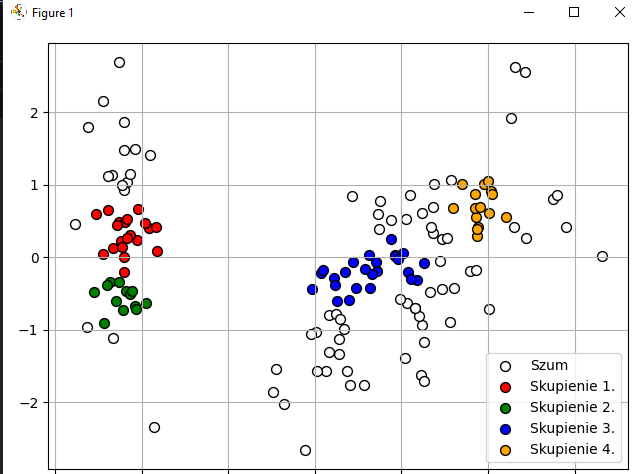

Idea działania algorytmu jest dosyć prosta:
Wybierane są punkty rdzeniowe, dla których w określonym promieniu znajduje się minimalna określona ilość sąsiadów.
Punkty niebędące rdzeniowymi mogą być graniczne, czyli takie, które nie posiadają wymaganej ilości punktów sąsiadujących, ale znajdują się w promieniu punktu rdzeniowego.
Punkty, które nie są ani graniczne ani rdzeniowe są uznawane za szum.
Punkty rdzeniowe mogą się łączyć w grupy, jeżeli odległość między nimi nie przekracza maks. długości promienia.

Zadanie 4
Te zadanie polega na zweryfikowaniu poprawności poprzez ocenę wyników z zadania 2 i 3.
Dokonane zostały oceny na podstawie Czystość (purity) klastrów oraz Zgodność klastrów z prawdziwymi klasami (Rand Index).
Do obliczeń zastosowany został oryginalny plik z danymi zawierający etykiety klas (irisORG.csv).

Poniżej znajduje się pobranie danych z pliku oraz spłaszczenie ich (wygenerowania listy wartości ekykiet klas)

In [ ]:
iris_original = pd.read_csv('./irisORG.csv')


def flatten(elem: list):
    return [item for sublist in elem for item in sublist]


y_true = flatten(iris_original.iloc[:, 4:].values)

Funkcja obliczająca czystość klastrów

In [ ]:
def calculate_purity_score(labels_true, labels_pred):
    matrix = contingency_matrix(labels_true, labels_pred)
    
    return np.sum(np.amax(matrix, axis = 0)) / np.sum(matrix)

Kod wypisujący czystość klastrów dla wyników zadań 2 i 3

In [ ]:
# Purity score
print(f'K-means purity score: {calculate_purity_score(y_true, y_kmeans) * 100 : .2f}%')
print(f'DBSCAN3 purity score: {calculate_purity_score(y_true, y_dbscan3) * 100 : .2f}%')
print(f'DBSCAN5 purity score: {calculate_purity_score(y_true, y_dbscan5) * 100 : .2f}%')
print(f'DBSCAN8 purity score: {calculate_purity_score(y_true, y_dbscan8) * 100 : .2f}%')

Wynik powyższego kodu:

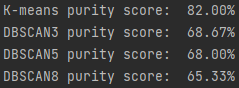

Kod wypisujący zgodność klastrów z prawdziwymi klasami dla wyników zadań 2 i 3

In [ ]:
# Rand index score
print(f'K-means Rand Index score: {rand_score(y_true, y_kmeans) * 100 : .2f}%')
print(f'DBSCAN3 Rand Index score: {rand_score(y_true, y_dbscan3) * 100 : .2f}%')
print(f'DBSCAN5 Rand Index score: {rand_score(y_true, y_dbscan5) * 100 : .2f}%')
print(f'DBSCAN8 Rand Index score: {rand_score(y_true, y_dbscan8) * 100 : .2f}%')

Wynik powyższego kodu:

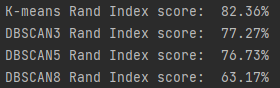

Jak widać w przypadku dobranych przeze mnie parametrów do algorytmu DBSCAN (prawdopodobnie słabo dobranych), algorytm k-najbliższych sąsiadów spisuje się lepiej.